# Minimum Viable Product Model + Visualizing Predictions of it

In [1]:
from utils.notebook_1_utils import * 
import utils.notebook_1_utils as utils

training_df = pd.read_csv("data/training.csv")#.iloc[:50]
lookup_df = pd.read_csv("data/IdLookupTable.csv")
training_df.fillna(method = 'ffill',inplace = True)

In [2]:
train_X, train_Y, val_X, val_Y = create_train_test_sets(training_df, normalize=True)

In [3]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape

((5640, 96, 96, 1), (5640, 30), (1409, 96, 96, 1), (1409, 30))

In [4]:
type(train_X[0][0][0][0])

numpy.float64

In [5]:
type(train_Y[0][0])

numpy.float64

## CNN definition

In [6]:
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

from keras import Sequential, optimizers
from keras.layers import Embedding, LSTM, Dense, Dropout,Bidirectional,ConvLSTM2D,GRU,SimpleRNN,RNN
from keras import regularizers
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D,Conv1D,MaxPooling1D, Conv2D , MaxPooling2D

model = Sequential()
model.add((Conv2D(filters=128, kernel_size=4, input_shape=(96, 96, 1),activation='relu', padding='same')))
model.add(Dense(64,activation='relu'))

model.add(Conv2D(32, 4, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Conv2D(16, 4, activation='relu'))
model.add(Conv2D(32, 4, activation='relu'))
model.add(Conv2D(32, 4, activation='relu'))

model.add((MaxPooling2D(pool_size=(4,4))))


model.add(Flatten())


model.add(Dense(30))


opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_logarithmic_error', metrics=['msle'])

In [7]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 128)       2176      
                                                                 
 dense (Dense)               (None, 96, 96, 64)        8256      
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 93, 32)        32800     
                                                                 
 dense_1 (Dense)             (None, 93, 93, 32)        1056      
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 16)        8208      
                                                                 
 conv2d_3 (Conv2D)           (None, 87, 87, 32)        8224      
                                                                 
 conv2d_4 (Conv2D)           (None, 84, 84, 32)        1

In [8]:
model.fit(train_X, train_Y, batch_size=128, epochs=15)

Epoch 1/15
45/45 [==============================] - 12s 164ms/step - loss: 1.4130 - msle: 1.4130
Epoch 2/15
45/45 [==============================] - 7s 160ms/step - loss: 0.5085 - msle: 0.5085
Epoch 3/15
45/45 [==============================] - 7s 160ms/step - loss: 0.4968 - msle: 0.4968
Epoch 4/15
45/45 [==============================] - 7s 160ms/step - loss: 0.4940 - msle: 0.4940
Epoch 5/15
45/45 [==============================] - 7s 161ms/step - loss: 0.4953 - msle: 0.4953
Epoch 6/15
45/45 [==============================] - 7s 161ms/step - loss: 0.3592 - msle: 0.3592
Epoch 7/15
45/45 [==============================] - 7s 162ms/step - loss: 0.0089 - msle: 0.0089
Epoch 8/15
45/45 [==============================] - 7s 161ms/step - loss: 0.0055 - msle: 0.0055
Epoch 9/15
45/45 [==============================] - 7s 162ms/step - loss: 0.0049 - msle: 0.0049
Epoch 10/15
45/45 [==============================] - 7s 162ms/step - loss: 0.0041 - msle: 0.0041
Epoch 11/15
45/45 [===================

## Showing Predictions

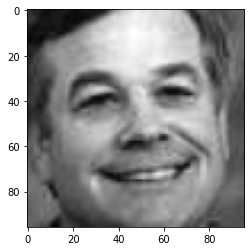

In [9]:
plt.imshow(val_X[0].reshape(96,96),cmap='gray')
plt.show()

In [10]:
preds = model.predict(val_X)

45/45 [==============================] - 1s 17ms/step


In [11]:
preds.shape

(1409, 30)

In [12]:
preds.shape

(1409, 30)

In [13]:
val_X.shape

(1409, 96, 96, 1)

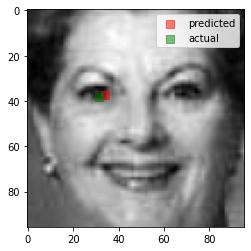

In [14]:


def show_pred(index,point):
    plt.imshow(val_X[index],cmap='gray')



    plt.scatter(preds[index][point],preds[index][point + 1],c='r', marker='s', s=60, alpha=.5)
    plt.scatter(val_Y[index][point],val_Y[index][point+1],c='g', marker='s', s=60, alpha=.5)

    plt.legend(['predicted','actual'])
    
show_pred(3, 2)


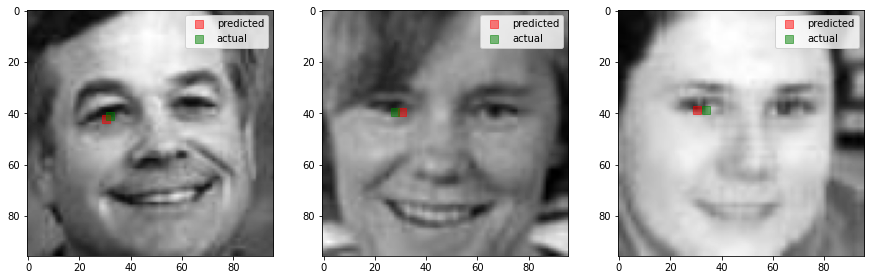

In [15]:
def show_preds(n, index,point):
    fig, ax = plt.subplots(1, n, figsize=(15, 5))
    for i in range(n):
        ax[i].imshow(val_X[index + i],cmap='gray')
        ax[i].scatter(preds[index + 1][point],preds[index + i][point + 1],c='r', marker='s', s=60, alpha=.5)
        ax[i].scatter(val_Y[index + i][point],val_Y[index + i][point+1],c='g', marker='s', s=60, alpha=.5)
        ax[i].legend(['predicted','actual'])
    
show_preds(3, 0, 2)

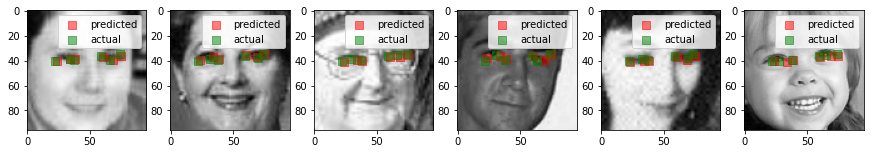

In [16]:
def show_all_preds(n, index):
    fig, ax = plt.subplots(1, n, figsize=(15, 5))
    for i in range(n):
        ax[i].imshow(val_X[index + i],cmap='gray')
        for point in range(0,12, 2):
            ax[i].scatter(preds[index + 1][point],preds[index + i][point + 1],c='r', marker='s', s=60, alpha=.5)
            ax[i].scatter(val_Y[index + i][point],val_Y[index + i][point+1],c='g', marker='s', s=60, alpha=.5)
        ax[i].legend(['predicted','actual'])
    
show_all_preds(6, 2)
    